In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
import requests
import json

In [37]:
df = pd.read_csv("/Users/maryam/Desktop/Final Project/ml-model/final_test.csv")


In [38]:
df

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [39]:
df.shape

(119734, 4)

In [40]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [41]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [43]:
df.isnull()

,weight,age,height,size
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
119729,False,False,False,False
119730,False,False,False,False
119731,False,False,False,False
119732,False,False,False,False


In [44]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [45]:
df.nunique()

weight    96
age       82
height    23
size       7
dtype: int64

In [46]:
df['weight'].unique()

array([ 62,  59,  61,  65,  50,  53,  51,  54,  63,  77,  64,  52,  55,
        74,  58,  47,  86,  68,  78,  49,  56,  81,  72,  60,  70,  79,
       113,  88, 104,  57,  95,  99,  80,  71,  83,  90,  66,  46,  73,
        48, 112,  69,  84,  45,  97,  75,  43,  67,  92,  76,  44, 102,
        40,  96, 108,  89,  82, 115, 122,  87,  91,  93,  85, 111,  98,
        94, 101, 125, 126, 131, 106, 107,  42,  22, 117,  31, 136, 120,
       123,  41, 118, 116, 100, 105, 124, 103,  35, 129, 119, 121, 109,
        26,  38,  36, 114,  39])

In [47]:
df['height'].unique()

array([172.72, 167.64, 165.1 , 175.26, 160.02, 170.18, 154.94, 177.8 ,
       157.48, 162.56, 147.32, 185.42, 180.34, 152.4 , 142.24, 182.88,
       187.96,    nan, 149.86, 190.5 , 144.78, 137.16, 193.04, 139.7 ])

In [48]:
df['age'].unique()

array([ 28.,  36.,  34.,  27.,  45.,  65.,  33.,  26.,  32.,  30.,  35.,
        21.,  20.,  37.,  50.,  43.,  29.,  47.,  31.,  48.,  40.,  52.,
        24.,  25.,  49.,  22.,  42.,  53.,  69.,  23.,  17.,  44.,  41.,
        59.,  39.,  38.,  51.,  46.,  54.,  nan,  62.,  58.,  19.,  55.,
        60.,  61.,  57.,  56.,  70.,  16.,   0.,  64.,  63.,  77.,  68.,
        66.,  18.,  67.,  75.,   3.,  85.,  87., 116.,  72.,   2.,  91.,
       117.,  71.,  92.,   9.,  99.,  15.,   4.,  76.,  14., 100.,   1.,
         5.,  73., 113.,  81.,  88., 112.])

In [49]:
df['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL'], dtype=object)

In [50]:
sizee = df['size'].value_counts()
sizee

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

<AxesSubplot:>

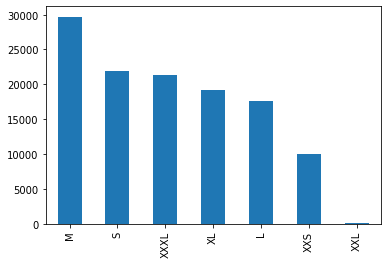

In [51]:
df['size'].value_counts().plot.bar()

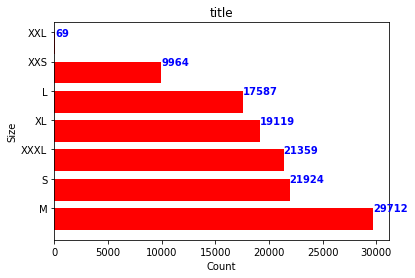

In [52]:
x = list(sizee.index)
y = list(sizee)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('title')
plt.xlabel('Count')
plt.ylabel('Size')
plt.show()

In [53]:
#df['size'] = df['size'].map({'XXS': 0, 'S': 1, 'M': 2, 'S': 3, 'L': 4, 'XXL': 5, 'XXXL': 6})
#df.head()

In [54]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [55]:


#df = df.dropna()
#print(df)
#df.head()

In [56]:
df.shape

(119734, 4)

In [57]:
df.dropna(inplace = True)
df.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [58]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values

In [59]:
X

array([[ 62.  ,  28.  , 172.72],
       [ 59.  ,  36.  , 167.64],
       [ 61.  ,  34.  , 165.1 ],
       ...,
       [ 61.  ,  31.  , 172.72],
       [ 74.  ,  31.  , 167.64],
       [ 70.  ,  30.  , 167.64]])

In [60]:
y

array(['XL', 'L', 'M', ..., 'M', 'XL', 'XL'], dtype=object)

In [61]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

In [62]:
print("Train data shape of X = % s and Y = % s: "%(X_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s: "%(
X_test.shape, y_test.shape))

Train data shape of X = (95322, 3) and Y = (95322,): 
Test data shape of X = (23831, 3) and Y = (23831,): 


In [63]:
#dt_prediction = DecisionTreeClassifier(criterion = "gini",
#                                     random_state = 10,
#                                     max_depth = 5,
#                                     min_samples_leaf = 5)
#dt_prediction.fit(X_train, y_train)
#y_pred = dt_prediction.predict(X_test)
 
#print(y_pred)
#print ("Decision Tree using Gini Index\nAccuracy is ",
#             accuracy_score(y_test, y_pred)*100 )

In [64]:
# Saving model to disk
#pickle.dump(regressor, open('model.pkl','wb'))
# Loading model to compare the results
#model = pickle.load(open('model.pkl','rb'))
#print(model.predict([[15, 61,77]]))

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =100)

In [66]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
y_predd = rfc.predict(X_test)

In [68]:
y_predd

array(['M', 'L', 'M', ..., 'M', 'XL', 'M'], dtype=object)

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predd)

array([[ 982, 1379,  161,  750,    1,   19,  215],
       [ 683, 3505, 1221,  359,    1,  134,   75],
       [ 110, 1277, 2188,   60,    0,  668,   20],
       [ 780,  697,   79, 1494,    0,    6,  764],
       [   5,    3,    0,    4,    0,    0,    8],
       [   6,  186,  903,    8,    0,  848,    6],
       [ 177,   98,   17,  661,    1,    4, 3268]])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predd)

0.5155050144769417

In [42]:
# Saving model to disk
pickle.dump(rfc, open('model.pkl','wb'))
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[15, 61,77]]))
print(model.predict([[45, 25,157]]))

['S']
['XXS']


In [37]:
 #prediction = pd.DataFrame(prediction, dtype=object)